In [38]:
# Importing Libraries for Dataset and Basic Operations
import numpy as np
import pandas as pd

In [39]:
# Reading CSV File
df = pd.read_csv('/content/Training File.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [40]:
df.columns=['TweetID','entity','sentiment','Tweet content']
df.head()

,TweetID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [41]:
df.tail()

,TweetID,entity,sentiment,Tweet content
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


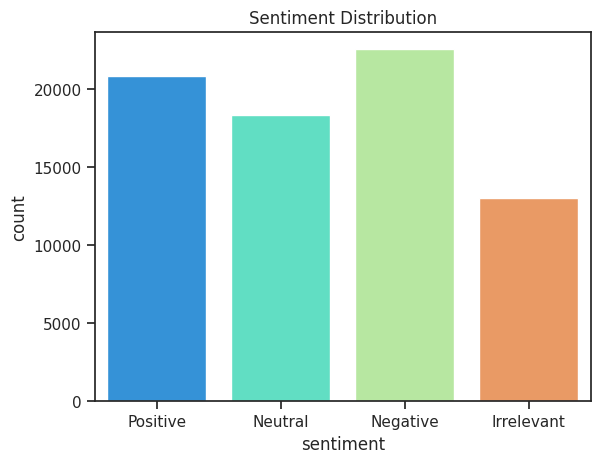

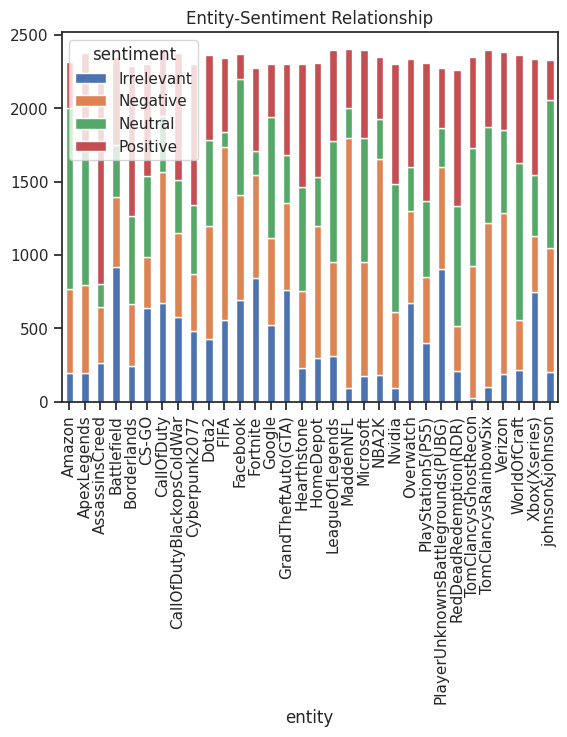

In [58]:
# Importing Libraries for Graph Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(x='sentiment', palette='rainbow' ,data=df)
plt.title('Sentiment Distribution')
plt.show()

# Entity and sentiment relationship
entity_sentiment_counts = df.groupby(['entity', 'sentiment']).size().unstack()
entity_sentiment_counts.plot(kind='bar' ,stacked=True)
plt.title('Entity-Sentiment Relationship')
plt.show()

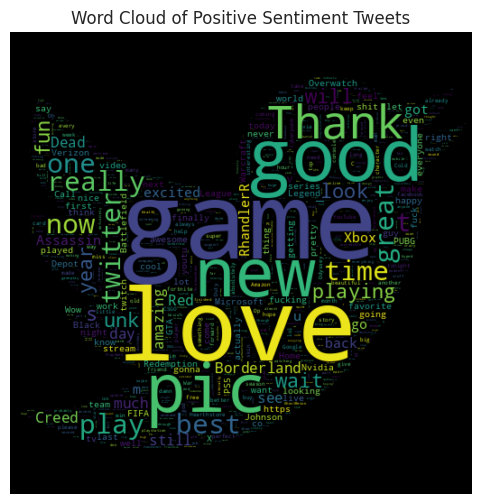

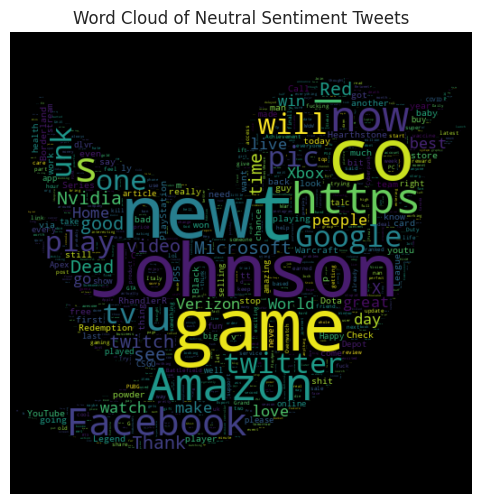

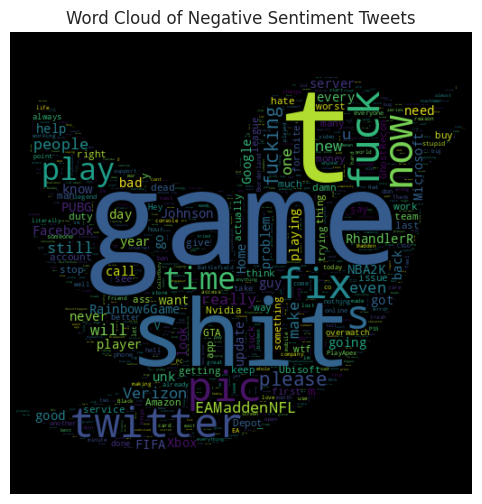

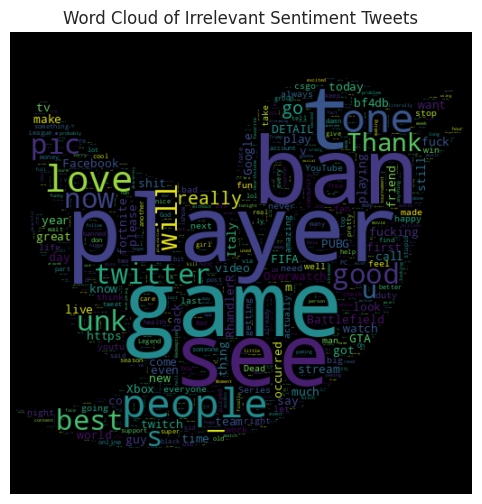

In [43]:
# Defining the specific words using wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

tw_mask = np.array(Image.open('/content/twitter_logo.jpg'))

# WordCloud Function
def generate_wordcloud(sentiment):
    tweets = df[df["sentiment"] == sentiment]["Tweet content"]

    tweets = tweets.astype(str)

    text = ' '.join(tweets)

    wordcloud = WordCloud(background_color = "black",
               width = 600, mask = tw_mask,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {sentiment} Sentiment Tweets')
    plt.show()

sentiments = df['sentiment'].unique()
for sentiment in sentiments:
    generate_wordcloud(sentiment)


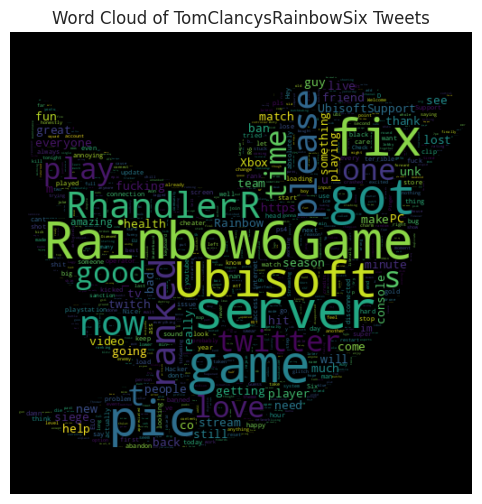

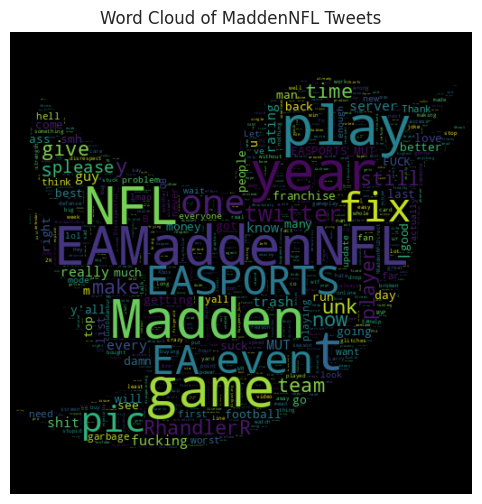

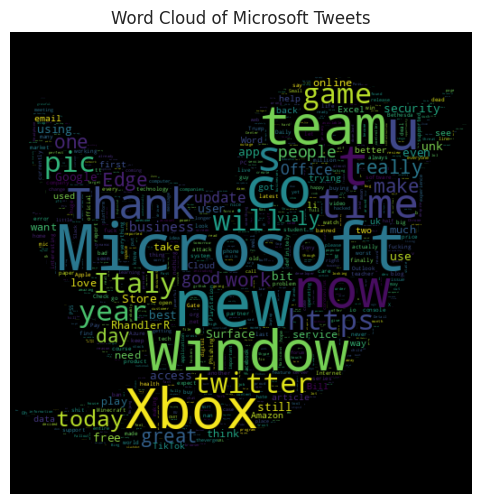

In [44]:
from wordcloud import WordCloud

entity_counts = df['entity'].value_counts()

top_entities = entity_counts.head(3).index.tolist()

for entity in top_entities:
    tweets = df[df['entity'] == entity]['Tweet content']

    tweets = tweets.astype(str)

    text = ' '.join(tweets)

    wordcloud = WordCloud(background_color = "black",
               width = 600, mask = tw_mask,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {entity} Tweets')
    plt.show()

In [45]:
# Importing NLTK & its data
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Apply preprocessing to the 'Tweet content' column
df['Tweet content']=df['Tweet content'].astype('str')
df['clean_text'] = df['Tweet content'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
#Importing Libraries for Training and Validation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

In [48]:
# Train a Random Forest classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val_vec)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print('Accuracy:', accuracy)
print('Classification Report:')
print(report)

Accuracy: 0.9137042244091852
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.97      0.86      0.91      2661
    Negative       0.94      0.92      0.93      4471
     Neutral       0.90      0.91      0.91      3551
    Positive       0.87      0.95      0.90      4254

    accuracy                           0.91     14937
   macro avg       0.92      0.91      0.91     14937
weighted avg       0.92      0.91      0.91     14937



In [50]:
# Load the validation dataset
validation_df = pd.read_csv('/content/Validation File.csv')

validation_df.columns=['TweetID','entity','sentiment','Tweet content']

In [51]:
# Preprocess the text data in the validation dataset
validation_df['clean_text'] = validation_df['Tweet content'].apply(preprocess_text)

# Vectorize the text data
X_val_data = vectorizer.transform(validation_df['clean_text'])

# Make predictions on the validation data
y_val_pred = rf_classifier.predict(X_val_data)

# save the predicted sentiments
predictions_df = pd.DataFrame({'Predicted Sentiment': y_val_pred})
predictions_df.to_csv('predicted_sentiments.csv', index=False)

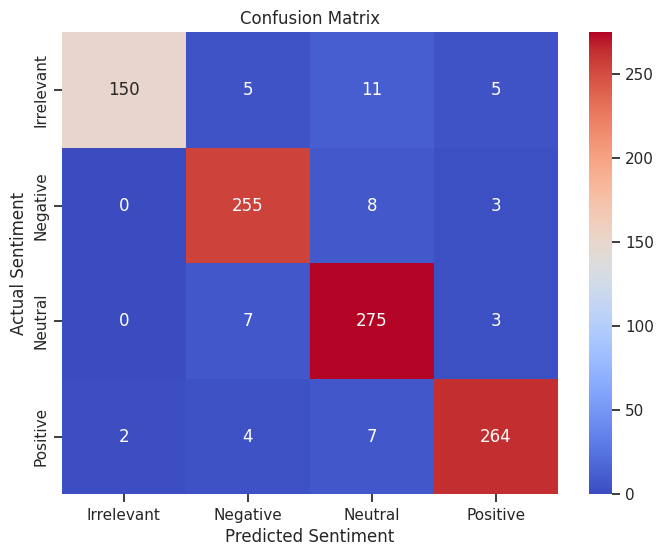

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.99      0.88      0.93       171
    Negative       0.94      0.96      0.95       266
     Neutral       0.91      0.96      0.94       285
    Positive       0.96      0.95      0.96       277

    accuracy                           0.94       999
   macro avg       0.95      0.94      0.94       999
weighted avg       0.95      0.94      0.94       999



In [63]:
from sklearn.preprocessing import LabelEncoder

# Define the LabelEncoder object
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the sentiment labels in the training data
label_encoder.fit(df['sentiment'])
from sklearn.metrics import confusion_matrix, classification_report

actual_sentiments=validation_df['sentiment']
predicted_sentiments=y_val_pred
# Create a confusion matrix
confusion = confusion_matrix(actual_sentiments, predicted_sentiments)

# Create a classification report
classification = classification_report(actual_sentiments, predicted_sentiments)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", classification)

# Result

## Accuracy -> 94%